<a href="https://colab.research.google.com/github/malikhassan016/HP-Z-UNFOLD/blob/main/EDA_Land_Coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Import Necessary Libraries

In [26]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

## Step 2: Import the Data

In [3]:
df_land = pd.read_csv("/content/drive/MyDrive/data science practise/Z_Unlocked/land_cover_data_11-30-2021.csv")
df_land.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data


## Step 3: View The Data Structure

In [4]:
rows,cols = df_land.shape
print(f'Total number of records are: {rows}')
print(f'Total number of features are: {cols}')

Total number of records are: 60760
Total number of features are: 14


In [5]:
df_land.describe()

,Element Code,Item Code,Year Code,Year,Value
count,60760.0,60760.000000,60760.000000,60760.000000,43400.00000
mean,5007.0,6976.500000,2009.517281,2009.517281,6387.39671
std,0.0,4.031162,5.187268,5.187268,40709.61358
min,5007.0,6970.000000,2001.000000,2001.000000,0.00000
25%,5007.0,6973.000000,2005.000000,2005.000000,0.00000
50%,5007.0,6976.500000,2010.000000,2010.000000,12.93320
75%,5007.0,6980.000000,2014.000000,2014.000000,464.09740
max,5007.0,6983.000000,2018.000000,2018.000000,982529.43280


In [6]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60760 entries, 0 to 60759
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       60760 non-null  object 
 1   Domain            60760 non-null  object 
 2   Area Code (ISO3)  60760 non-null  object 
 3   Area              60760 non-null  object 
 4   Element Code      60760 non-null  int64  
 5   Element           60760 non-null  object 
 6   Item Code         60760 non-null  int64  
 7   Item              60760 non-null  object 
 8   Year Code         60760 non-null  int64  
 9   Year              60760 non-null  int64  
 10  Unit              60760 non-null  object 
 11  Value             43400 non-null  float64
 12  Flag              60760 non-null  object 
 13  Flag Description  60760 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 6.5+ MB


## Step 4: Find the Null Values

In [7]:
df_land.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value               17360
Flag                    0
Flag Description        0
dtype: int64

In [8]:
df_land.isnull().sum() / df_land.shape[0]*100

Domain Code          0.000000
Domain               0.000000
Area Code (ISO3)     0.000000
Area                 0.000000
Element Code         0.000000
Element              0.000000
Item Code            0.000000
Item                 0.000000
Year Code            0.000000
Year                 0.000000
Unit                 0.000000
Value               28.571429
Flag                 0.000000
Flag Description     0.000000
dtype: float64

In [9]:
df_land[df_land["Value"].isnull()].head(20)

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
36,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2001,2001,1000 ha,NaN,NV,Data not available
37,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2002,2002,1000 ha,NaN,NV,Data not available
38,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2003,2003,1000 ha,NaN,NV,Data not available
39,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2004,2004,1000 ha,NaN,NV,Data not available
40,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2005,2005,1000 ha,NaN,NV,Data not available
41,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2006,2006,1000 ha,NaN,NV,Data not available
42,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2007,2007,1000 ha,NaN,NV,Data not available
43,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2008,2008,1000 ha,NaN,NV,Data not available
44,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2009,2009,1000 ha,NaN,NV,Data not available
45,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6972,Woody crops,2010,2010,1000 ha,NaN,NV,Data not available


## Step 5: Handling the missing data

In [10]:
df_land = df_land[df_land["Flag Description"] != "Data not available"]
df_land.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43472 entries, 0 to 60741
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       43472 non-null  object 
 1   Domain            43472 non-null  object 
 2   Area Code (ISO3)  43472 non-null  object 
 3   Area              43472 non-null  object 
 4   Element Code      43472 non-null  int64  
 5   Element           43472 non-null  object 
 6   Item Code         43472 non-null  int64  
 7   Item              43472 non-null  object 
 8   Year Code         43472 non-null  int64  
 9   Year              43472 non-null  int64  
 10  Unit              43472 non-null  object 
 11  Value             43400 non-null  float64
 12  Flag              43472 non-null  object 
 13  Flag Description  43472 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.0+ MB


In [11]:
df_land[df_land["Value"].isnull()].head(20)

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
11124,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2001,2001,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11125,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2002,2002,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11126,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2003,2003,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11127,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2004,2004,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11128,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2005,2005,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11129,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2006,2006,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11130,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2007,2007,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11131,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2008,2008,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11132,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2009,2009,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."
11133,LC,Land Cover,CHN,China,5007,Area from MODIS,6972,Woody crops,2010,2010,1000 ha,NaN,A,"Aggregate, may include official, semi-official..."


In [12]:
df_land["Value"] = df_land.groupby('Area')['Value'].transform(lambda x: x.fillna(x.mean()))

In [13]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43472 entries, 0 to 60741
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       43472 non-null  object 
 1   Domain            43472 non-null  object 
 2   Area Code (ISO3)  43472 non-null  object 
 3   Area              43472 non-null  object 
 4   Element Code      43472 non-null  int64  
 5   Element           43472 non-null  object 
 6   Item Code         43472 non-null  int64  
 7   Item              43472 non-null  object 
 8   Year Code         43472 non-null  int64  
 9   Year              43472 non-null  int64  
 10  Unit              43472 non-null  object 
 11  Value             43472 non-null  float64
 12  Flag              43472 non-null  object 
 13  Flag Description  43472 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.0+ MB


## Step 6: Features Seelction

In [14]:
df_land.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data


In [15]:
df1 = df_land.copy()

In [16]:
df_land = df_land[["Area Code (ISO3)","Area","Item","Year","Value"]]

In [37]:
#Adding a new column of Continent 
#pip install pycountry_convert
# # #Making new columns of Continent for Visualization

import pycountry_convert as pc
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
# Example
# country_name = 'Chagos Archipelago'
# print(country_to_continent(country_name))
continent=[]
for i in df_land['Area']:
    
   if i=='Chagos Archipelago':
       continent.append('Africa')
       
   elif i=='Western Sahara':
       continent.append('Africa')
   elif i=='Channel Islands'  :
       continent.append('Europe')
   elif i=='China, Hong Kong SAR'  :
       continent.append('Asia')
   elif i=='China, Macao SAR'  :
       continent.append('Asia')
   elif i=='China, mainland'  :
       continent.append('Asia')
   elif i=='China, Taiwan Province of'  :
       continent.append('Asia')
   elif i=='French Guyana'  :
       continent.append('South America')
   elif i=='French Southern Territories'  :
       continent.append('Antarctica')
   elif i=='Heard and McDonald Islands'  :
       continent.append('Antarctica')
   elif i=='Holy See'  :
       continent.append('Europe')
   elif i=='Iran (Islamic Republic of)'  :
       continent.append('Europe')
   elif i=='Johnston Island'  :
       continent.append('Oceania')
   elif i=='Micronesia (Federated States of)'  :
       continent.append('Oceania')
   elif i=='Midway Island'  :
       continent.append('North America')
   elif i=='Netherlands Antilles (former)'  :
       continent.append('Europe')
   elif i=='Pitcairn'  :
       continent.append('Oceania')
   elif i=='Wake Island'  :
       continent.append('Oceania')
   elif i=='Wallis and Futuna Islands'  :
       continent.append('Oceania')
   elif i=='Republic of Korea'  :
       continent.append('Asia')
   elif i=='Serbia and Montenegro'  :
       continent.append('Europe')
   elif i=='Sudan (former)'  :
       continent.append('Asia')
   elif i=='Timor-Leste'  :
       continent.append('Asia')
   elif i=='Venezuela (Bolivarian Republic of)'  :
       continent.append('South America')
   elif i=='Antarctica' :
       continent.append('Antarctica')
   elif i=='Bolivia (Plurinational State of)' :
       continent.append('South America')
   else:
      continent.append(country_to_continent(i))

df_land["continent"]=continent

In [17]:
df_selected = df_land[df_land["Area"].isin(["India", "Afghanistan", "Pakistan"])]

In [18]:
df_selected[df_selected["Item"] == "Tree-covered areas"].head()

,Area Code (ISO3),Area,Item,Year,Value
90,AFG,Afghanistan,Tree-covered areas,2001,554.8927
91,AFG,Afghanistan,Tree-covered areas,2002,562.0837
92,AFG,Afghanistan,Tree-covered areas,2003,560.0445
93,AFG,Afghanistan,Tree-covered areas,2004,559.8942
94,AFG,Afghanistan,Tree-covered areas,2005,562.5345


In [19]:
# === Covered Forest Land ===

# Filter only tree-covered areas & Group
landcover = df_selected[df_selected["Item"] == "Tree-covered areas"]
landcover = landcover.groupby(["Area","Year"])["Value"].sum().reset_index()

# Select only the base year (2001) and reference year (2018)
# and compute the percent change between them
#landcover = landcover[(landcover["Year"] == 2001) | (landcover["Year"] == 2018)].reset_index()
#landcover = landcover.pivot(index=["Area", "Area Code (ISO3)"], columns = "Year", values="Value").reset_index()
#landcover["%change"] = ((landcover[2018] - landcover[2001])/ landcover[2001])*100

landcover.head()

,Area,Year,Value
0,Afghanistan,2001,554.8927
1,Afghanistan,2002,562.0837
2,Afghanistan,2003,560.0445
3,Afghanistan,2004,559.8942
4,Afghanistan,2005,562.5345


## Step 7: Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


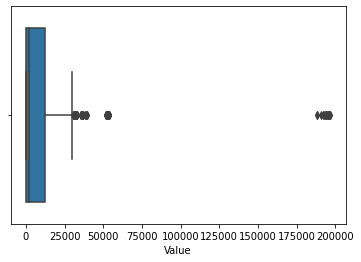

In [20]:
sns.boxplot(df_selected["Value"])

## Step 8: Checking the Normalization

(array([432.,  70.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,  18.]),
 array([     0.     ,  19680.81002,  39361.62004,  59042.43006,
         78723.24008,  98404.0501 , 118084.86012, 137765.67014,
        157446.48016, 177127.29018, 196808.1002 ]),
 <a list of 10 Patch objects>)

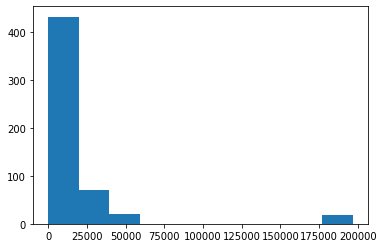

In [21]:
plt.hist(df_selected["Value"])

## Step 8: Plotting the Data

In [22]:
df_land["Item"].value_counts()

Artificial surfaces (including urban and associated areas)           4340
Herbaceous crops                                                     4340
Grassland                                                            4340
Tree-covered areas                                                   4340
Mangroves                                                            4340
Shrub-covered areas                                                  4340
Shrubs and/or herbaceous vegetation, aquatic or regularly flooded    4340
Terrestrial barren land                                              4340
Permanent snow and glaciers                                          4340
Inland water bodies                                                  4340
Woody crops                                                            18
Multiple or layered crops                                              18
Sparsely natural vegetated areas                                       18
Coastal water bodies and intertidal ar

In [23]:
df1 = df_land.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()

In [24]:
df1.head()

,Area,Area Code (ISO3),Year,Value
0,Afghanistan,AFG,2001,64121.1645
1,Afghanistan,AFG,2002,64180.4962
2,Afghanistan,AFG,2003,64222.2902
3,Afghanistan,AFG,2004,64318.0924
4,Afghanistan,AFG,2005,64318.7364


In [27]:
fig = px.line(df1, x="Year", y="Value",color='Area', title='World Land Covered Areas')
fig.show()

In [28]:
# Create the layout of the chart
title = '<b>World Land Covered Areas</b>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)


# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = df1['Area Code (ISO3)'],
    z = df1['Value'],
    text = df1['Area'],
    colorscale = 'Viridis',
    #color_continuous_scale="RdYlGn",
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Landcover',
)

fig2.add_trace(trace2)
fig2.show()

In [57]:
df_top = df_land[df_land["Area"].isin(["Russian Federation", "China", "Antarctica", "Canada","China, mainland"])]

In [30]:
df2 = df_top.groupby(["Area","Area Code (ISO3)","Year"])["Value"].sum().reset_index()

In [31]:
df2.head()

,Area,Area Code (ISO3),Year,Value
0,Antarctica,ATA,2001,1.034901e+06
1,Antarctica,ATA,2002,1.034901e+06
2,Antarctica,ATA,2003,1.034901e+06
3,Antarctica,ATA,2004,1.034901e+06
4,Antarctica,ATA,2005,1.034901e+06


In [32]:
df2 = df_top.groupby(["Area","Item"])["Value"].max().reset_index()

In [33]:
df2.head()

,Area,Item,Value
0,Antarctica,Artificial surfaces (including urban and assoc...,0.0000
1,Antarctica,Grassland,28.0774
2,Antarctica,Herbaceous crops,0.0000
3,Antarctica,Inland water bodies,52257.0441
4,Antarctica,Mangroves,0.0000


In [68]:
df_top = df_top[df_top["Year"] == 2018]
df2018 = df_top.groupby(["Item","Area"])["Value"].sum().sort_values(ascending=False).reset_index().head(10)
df2018.head(10)

,Item,Area,Value
0,Permanent snow and glaciers,Antarctica,982452.7997
1,Tree-covered areas,Russian Federation,913348.9308
2,Tree-covered areas,Canada,485689.4532
3,Shrub-covered areas,Russian Federation,316535.2804
4,Grassland,China,277606.0198
5,Grassland,"China, mainland",277552.1834
6,Tree-covered areas,China,269840.9956
7,Tree-covered areas,"China, mainland",267312.3336
8,Grassland,Russian Federation,229039.2889
9,Terrestrial barren land,China,218152.4793


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

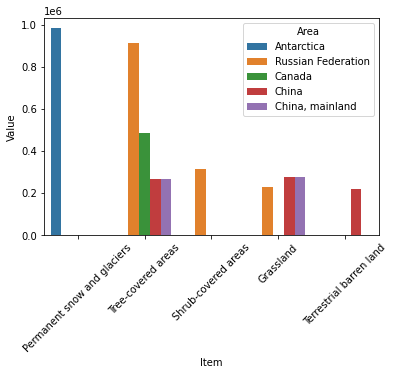

In [70]:
sns.barplot(x="Item", y="Value",hue="Area",data=df2018)
plt.xticks(rotation=45)

In [74]:
# Create the layout of the chart
title = '<b>World Land Covered Areas</b>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)


# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = df2['Area Code (ISO3)'],
    z = df2['Value'],
    text = df2['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Landcover',
)

fig2.add_trace(trace2)
fig2.show()

KeyError: ignored

In [73]:
df_selected[df_selected["Area"] == "India"].value_counts()

Area Code (ISO3)  Area   Item                                                        Year  Value     
IND               India  Artificial surfaces (including urban and associated areas)  2001  3331.7602     1
                         Shrub-covered areas                                         2006  9977.9576     1
                                                                                     2008  9763.9773     1
                                                                                     2009  9718.2464     1
                                                                                     2010  9113.7805     1
                                                                                                        ..
                         Inland water bodies                                         2008  5292.5813     1
                                                                                     2009  5280.1526     1
                                          

In [72]:
import plotly.express as px


fig = px.line(landcover, x="Year", y="Value",color='Area', title='Tree Covered Areas')
fig.show()

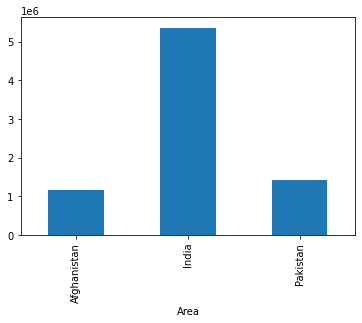

In [71]:
df_selected.groupby('Area').Value.sum().plot(kind='bar')